In [7]:
# Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set(style="whitegrid")

# Suppress warnings for a cleaner output (optional)
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Load the dataset
df = pd.read_csv('happiness_score_dataset.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [9]:
# Convert infinite values to Nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [10]:
# Basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(df.describe())


Basic statistics of the dataset:
       Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%  

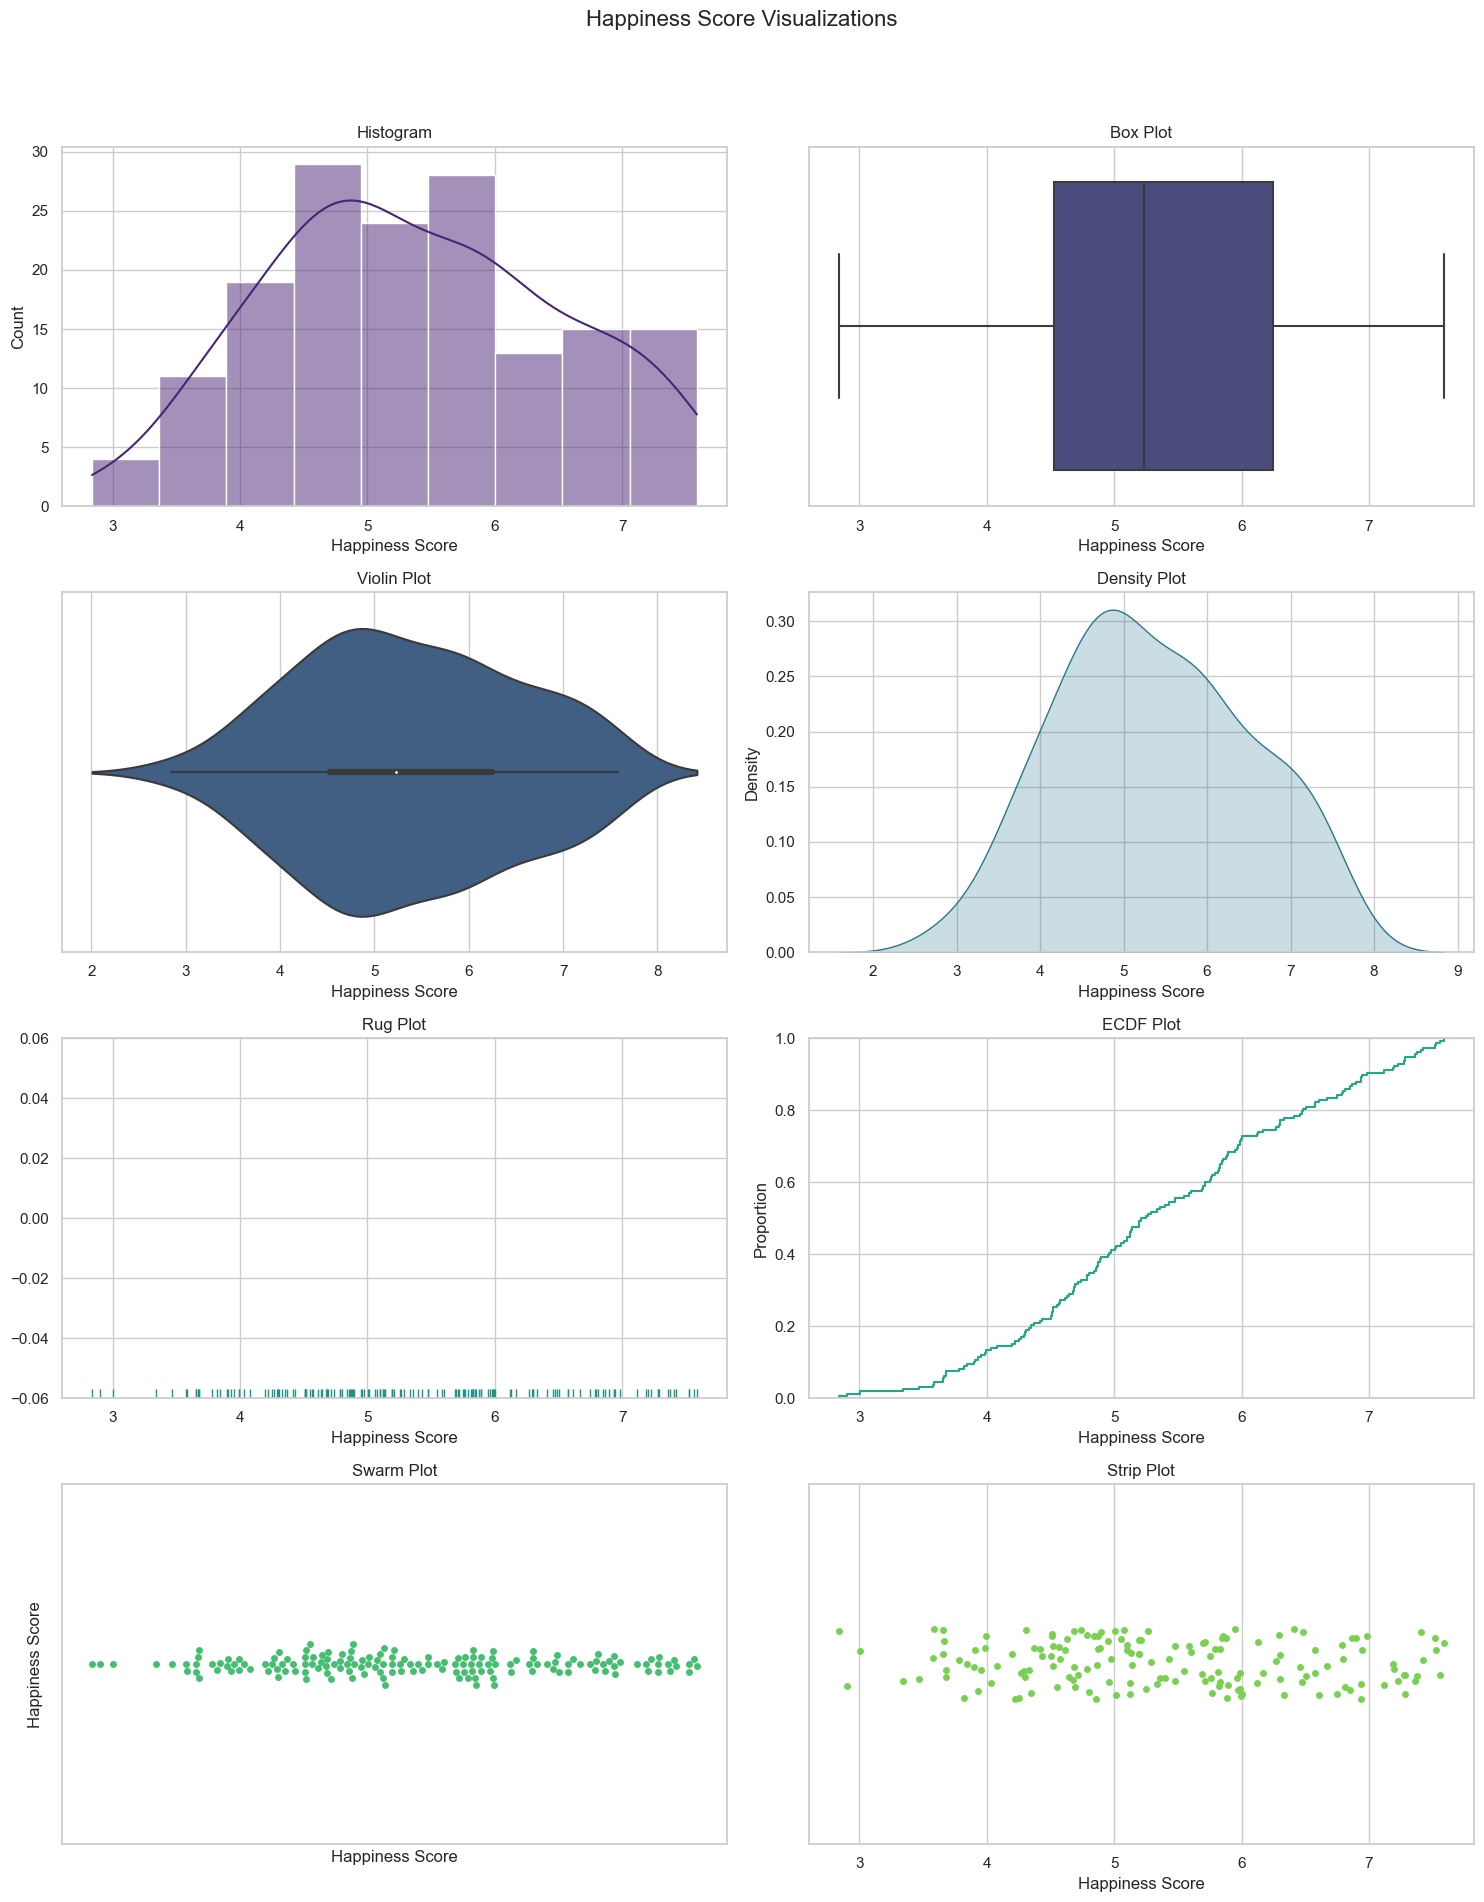

In [23]:
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", as_cmap=True)

#grid layout
fig, axes =plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Happiness Score Visualizations', fontsize=16)

#Histogram
sns.histplot(df['Happiness Score'], kde=True, ax=axes[0, 0], color=palette(0.1))
axes[0, 0].set_title('Histogram')

#Box Plot
sns.boxplot(x=df['Happiness Score'], ax=axes[0, 1], color=palette(0.2))
axes[0, 1].set_title('Box Plot')

#Violin Plot
sns.violinplot(x=df['Happiness Score'], ax=axes[1, 0], color=palette(0.3))
axes[1, 0].set_title('Violin Plot')

#Density Plot
sns.kdeplot(x=df['Happiness Score'], fill=True, ax=axes[1, 1], color=palette(0.4))
axes[1, 1].set_title('Density Plot')

#Rug Plot
sns.rugplot(df['Happiness Score'],  ax=axes[2, 0], color=palette(0.5))
axes[2, 0].set_title('Rug Plot')

#ECDF Plot
sns.ecdfplot(df['Happiness Score'],  ax=axes[2, 1], color=palette(0.6))
axes[2, 1].set_title('ECDF Plot')

#Swarm Plot
sns.swarmplot(df['Happiness Score'],  ax=axes[3, 0], color=palette(0.7))
axes[3, 0].set_title('Swarm Plot')

#Swarm Plot
sns.swarmplot(x=df['Happiness Score'],  ax=axes[3, 0], color=palette(0.7))
axes[3, 0].set_title('Swarm Plot')

#Strip Plot
sns.stripplot(x=df['Happiness Score'],  ax=axes[3, 1], color=palette(0.8))
axes[3, 1].set_title('Strip Plot')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [25]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print("\nNon-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['Country', 'Region'], dtype='object')


In [26]:
# Drop non-numeric columns for correlation matrix
df_numeric = df.select_dtypes(include=[np.number])

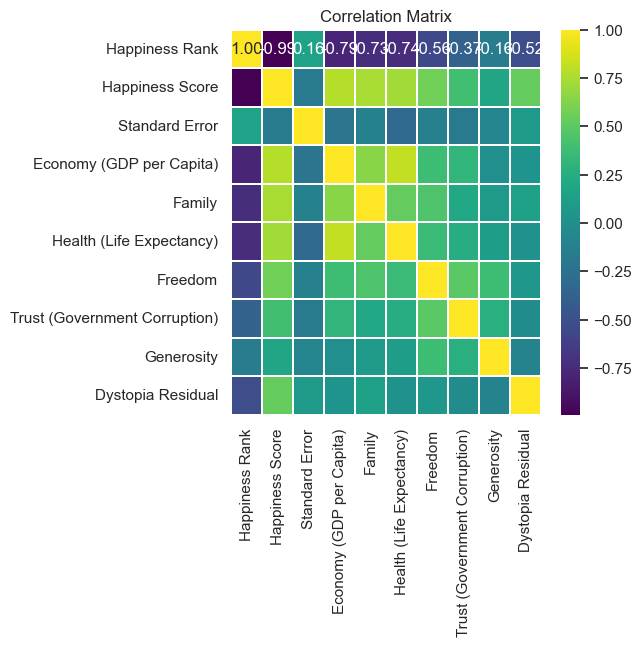

In [28]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Plot the correlation matrix with a different color palette

plt.figure(figsize=(5, 5))
sns.heatmap(df_numeric.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=0.3)
plt.title('Correlation Matrix')
plt.show()

In [29]:
# Define features and target variable

X = df_numeric.drop(columns=['Happiness Score'])
y = df_numeric['Happiness Score']
                            
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                             
# Standardize features
                             
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Initialize the model

model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Display coefficients
print("\nModel Coefficients:")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Model Evaluation:
Mean Squared Error: 7.427424037353629e-08
R^2 Score: 0.9999999476481373

Model Coefficients:
                               Coefficient
Happiness Rank                   -0.000207
Standard Error                   -0.000018
Economy (GDP per Capita)          0.390440
Family                            0.278934
Health (Life Expectancy)          0.237616
Freedom                           0.149825
Trust (Government Corruption)     0.123153
Generosity                        0.122475
Dystopia Residual                 0.557405


In [31]:
# Ensure new data has the correct features names

new_data = pd.DataFrame({
    'GDP per Capita': [1.0],
    'Family': [0.8],
    'Life Expectancy': [0.9],
    'Freedom': [0.7],
    'Generosity': [0.6],
    'Trust Government Corruption': [0.5]   
}, columns=X.columns)

# Handle NaN values
new_data.fillna(0, inplace=True)

# Standardize new data
new_data_scaled = scaler.transform(new_data)

#make predictions
new_predictions = model.predict(new_data_scaled)
print("\nPredicated Happiness Scores for New Data:")
print(new_predictions)


Predicated Happiness Scores for New Data:
[2.10083449]
